# <span style="color:black"> Esercitazioni - lezione 8 </span>

## <span style="color:black"> Esercizio 08.1 </span>

Questo esercizio consiste nello scrivere un codice per trovare uno stato approssimato di ground state di un sistema utilizzando l'algoritmo di Metropolis per campionare la densità di probabilità.In particolare il sistema in esame è quello di una singola particella unidimensionale confinata nel potenziale esterno: 
$$ V(x) = x^4 - \frac{5}{2}x^2 $$
Il Variational Monte Carlo si basa sul principio variazionale di Ritz, secondo il quale il funzionale 
$$
E_T = \frac{\langle\psi_T|\hat{H}|\psi_T\rangle}{\langle\psi_T|\psi_T\rangle} 
    \geq E_{G.S.}
$$
dove $\psi_T$ è una funzione di prova ed $E_{G.S.}$ è il funzionale che si ottiene nel momento in cui la funzione d'onda di prova $\psi_T$ corrisponda esattamente alla funzione di ground state $\psi_{G.S.}$  
Il modello della funzione di prova scelto è (trascurando la normalizzazione che, utilizzando l'algoritmo di Metropolis risulta ininfluente): 
$$
\psi_T^{\sigma,\mu}(x) = e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                         e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

Si noti che questo modello dipende da due parametri, $\mu$ e $\sigma$. Questi sono i parametri che, sfruttando il principio variazionale, andranno minimizzati per trovare uno stato di ground state approssimato.
Per calcolare il valore dell'energia, dato dal funzionale scritto sopra, è stato quindi necessario calcolarne la derivata seconda, che emerge dall'applicazione dell'operatore cinetico alla stessa funzione di prova:
$$
\frac{d\psi_T^{\sigma, \mu}(x)}{dx} = -\frac{(x-\mu)e^{-\frac{(x-\mu)^2}{2\sigma^2}}}{\sigma^2} 
                                      -\frac{(x+\mu)e^{-\frac{(x+\mu)^2}{2\sigma^2}}}{\sigma^2}
$$

$$
\frac{d^2\psi_T^{\sigma, \mu}}{dx^2} = \frac{e^{-\frac{(x+\mu)^2}{2\sigma^2}}}{\sigma^4} \cdot
\left( -\sigma^2+e^{\frac{ 2\mu x}{\sigma^2}} (-\mu-\sigma+x)(-\mu+\sigma+x)+(\mu+x)^2 \right)
$$
Si sono ottenuti così tutti gli ingredienti per scrivere il codice, che è stato organizzato come di norma con l'implementazione del metodo dei blocchi: dopo una funzione di inizializzazione in cui sono caricati i parametri di input da un file - e azzerato un istogramma che andrà a rappresentare la distribuzione di probabilità $\left|\psi(x)\right|^2$ - per ogni blocco si è tentata *nstep* volte una mossa $x_0 \to x_1$ e la si è accettata secondo probabilità $\alpha = min\left\{1,\frac{\left|\psi(x_1)\right|^2}{\left|\psi(x_0)\right|^2}\right\}$. In caso di accettazione della mossa si è anche riempito l'istogramma precedentemente azzerato con i valori delle posizioni visitate.
Alla fine di ogni blocco si è quindi misurato il valore medio dell'energia. Utilizzando come valori dei parametri $\mu=1$ e $\sigma=1$, sono stati ottenuti i risultati presentati nel box successivo per il valore medio dell'energia e la sua incertezza statistica.
Gli altri parametri di input utilizzati sono:
* *nstep* = 10000 per evitare correlazione tra gli elementi di un blocco
* *passo* = 5.3 scelto per regolare l'accettazione dell'algoritmo Metropolis circa al 50%
* *$x_0$* = 1 $\rightarrow$ valore iniziale della posizione.

N.B. Per tutta l'esercitazione si sono usate le unità di misura in cui $\hbar=1$, $k_B=1$ e la massa $m=1$

In [45]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os
import matplotlib.gridspec as gridspec

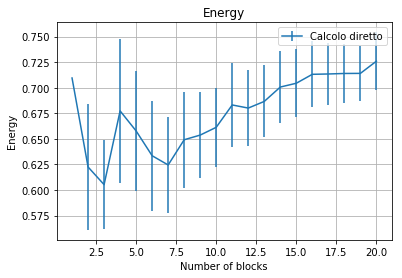

In [18]:
os.system("./clean.sh");
input_text="10000 \n5.3 \n20 \n" + str(1) + " \n" + str(1) + " \n1 \n\n  ReadInput >> nstep; //(per block) \n  ReadInput >> passo; \n  ReadInput >> nblk; \n  ReadInput >> mu; \n  ReadInput >> sig; \n  ReadInput >> x;"
file_input = open("input.dat", "w")
file_input.write(input_text)
file_input.close()
os.system("./main.exe");
x1, f1, error1 = np.loadtxt('output.ene.0', usecols=(0,2,3), unpack='true')
plt.errorbar(x1, f1, yerr=error1, label='Calcolo diretto')
plt.xlabel("Number of blocks")
plt.ylabel(r'Energy')
plt.title("Energy")
plt.legend()
plt.grid()
plt.show()


## <span style="color:black"> Esercizio 08.2 </span>

Lo stato trovato al punto precedente non rappresenta evidentemente quello di ground state. Per trovare questo bisogna ottimizzare i parametri $\mu$ e $\sigma$ da cui dipende il modello di funzione di prova scelto. Per farlo si è scritto uno script in python (riportato sotto) che vada a ciclare su possibili valori dei due parametri, costruendo così una matrice di valori (si è scelto $15\times15$) di energia. Una volta individuato il minimo elemento di matrice, si è ripetuto il procedimento su un sottointervallo dei corrispondenti valori di $\mu$ e $\sigma$. E' riportato sotto il procedimento, con una visualizzazione dei valori ottenuti per l'energia.  
Si nota che iterare di nuovo questo procedimento non avrebbe portato a risultati migliori in quanto, se alla prima iterazione i punti individuano una ben precisa superficie, e quindi l'operazione di cercare il minimo è carica di significato, nella seconda iterazione i punti sono distribuiti con una varianza percentuale maggiore rispetto alla superfice che meglio li fitterebbe. Di conseguenza cercarne il minimo e sviluppare di nuovo intorno ad esso non garantirebbe un miglioramento significativo della stima dell'energia ma porterebbe quasi sicuramente a *cadere* in un minimo locale. 

Evaluating Energy in range: mu=(0.5,1.0) and sigma=(0.5,1.0)
Run 1 of 15
Run 2 of 15
Run 3 of 15
Run 4 of 15
Run 5 of 15
Run 6 of 15
Run 7 of 15
Run 8 of 15
Run 9 of 15
Run 10 of 15
Run 11 of 15
Run 12 of 15
Run 13 of 15
Run 14 of 15
Run 15 of 15


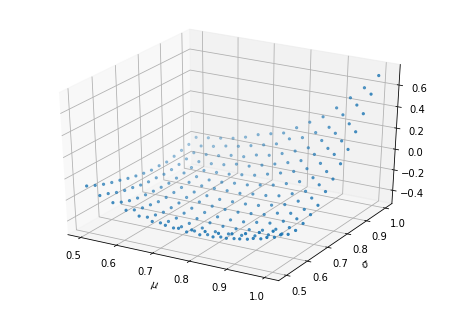

mu = 0.7857142857142857 ; sigma = 0.6071428571428571 ; E = -0.447046 

Evaluating Energy in a better range
Run 1 of 15
Run 2 of 15
Run 3 of 15
Run 4 of 15
Run 5 of 15
Run 6 of 15
Run 7 of 15
Run 8 of 15
Run 9 of 15
Run 10 of 15
Run 11 of 15
Run 12 of 15
Run 13 of 15
Run 14 of 15
Run 15 of 15


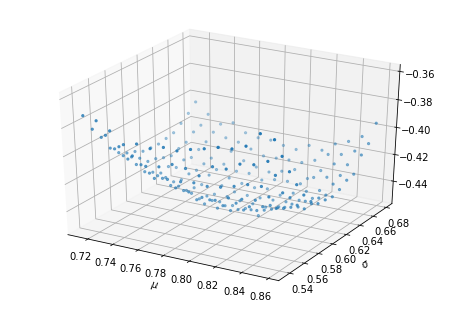


 mu = 0.8061224489795918 ; sigma = 0.6071428571428571 ; E = -0.450643


In [24]:
Nmu=15;
Nsigma=15;
mu=np.linspace(0.5,1.0,Nmu)
deltamu=mu[1]-mu[0]
sigma=np.linspace(0.5,1.0, Nsigma)
deltasigma=sigma[1]-sigma[0]
matrix_text=np.chararray((Nmu,Nsigma));
data=np.zeros((Nmu, Nsigma, 3));
minval=5
print('Evaluating Energy in range: mu=(0.5,1.0) and sigma=(0.5,1.0)')
for i in range(Nmu):
    print ('Run '+str(i+1)+' of '+str(Nmu))
    for j in range(Nsigma):
        os.system("./clean.sh");
        input_text="10000 \n6 \n20 \n" + str(mu[i]) + " \n" + str(sigma[j]) + " \n1 \n\n  ReadInput >> nstep; //(per block) \n  ReadInput >> passo; \n  ReadInput >> nblk; \n  ReadInput >> mu; \n  ReadInput >> sig; \n  ReadInput >> x;"
        file_input = open("input.dat", "w")
        file_input.write(input_text)
        file_input.close()
        os.system("./main.exe");
        data[i, j] = np.loadtxt("output.ene.0", usecols=(2,4,5), unpack=True, skiprows=19)
        if data[i][j][0]<minval:
            minval=data[i][j][0]
            bestmu=mu[i]
            bestsigma=sigma[j]
#            print(i, j, mu[i], sigma[j], data[i][j][:])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:,:,1], data[:,:,2], data[:,:,0], marker='.')
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\sigma$')
#ax.view_init(10, 30)
plt.show()
print('mu = '+str(bestmu),'; sigma = '+str(bestsigma), '; E = '+str(minval), '\n')


print('Evaluating Energy in a better range')
mu=np.linspace(bestmu-2*deltamu, bestmu+2*deltamu,Nmu)
sigma=np.linspace(bestsigma-2*deltasigma, bestsigma+2*deltasigma, Nsigma)
minval=5
for i in range(Nmu):
    print ('Run '+str(i+1)+' of '+str(Nmu))
    for j in range(Nsigma):
        os.system("./clean.sh");
        input_text="10000 \n6 \n20 \n" + str(mu[i]) + " \n" + str(sigma[j]) + " \n1 \n\n  ReadInput >> nstep; //(per block) \n  ReadInput >> passo; \n  ReadInput >> nblk; \n  ReadInput >> mu; \n  ReadInput >> sig; \n  ReadInput >> x;"
        file_input = open("input.dat", "w")
        file_input.write(input_text)
        file_input.close()
        os.system("./main.exe");
        data[i, j] = np.loadtxt("output.ene.0", usecols=(2,4,5), unpack=True, skiprows=19)
        if data[i][j][0]<minval:
            minval=data[i][j][0]
            bestmu=mu[i]
            bestsigma=sigma[j]
            
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:,:,1], data[:,:,2], data[:,:,0], marker='.')
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\sigma$')
#ax.view_init(10, 30)
plt.show()
print('\n','mu = '+str(bestmu),'; sigma = '+str(bestsigma), '; E = '+str(minval))

Con i valori dei parametri così individuati si è potuti quindi stimare l'energia di ground state (questa volta sono stati utilizzati 100 blocchi per assicurarci una convergenza del risultato), il cui risultato è riportato nel grafico sottostante. In arancione è riportato il risultato numerico ottenuto diagonalizzando l'equazione di Schoringer scritta in forma matriciale.

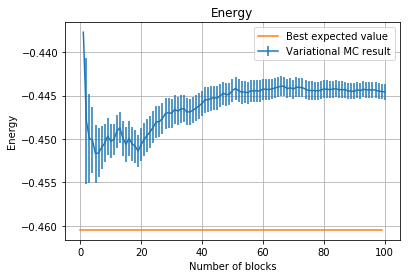

I migliori valori trovati di mu e sigma sono:
mu = 0.8061224489795918, sigma = 0.6071428571428571
La corrispondente energia di ground state vale E = -0.450643


In [30]:
os.system("./clean.sh");
input_text="10000 \n6 \n100 \n" + str(bestmu) + " \n" + str(bestsigma) + " \n1 \n\n  ReadInput >> nstep; //(per block) \n  ReadInput >> passo; \n  ReadInput >> nblk; \n  ReadInput >> mu; \n  ReadInput >> sig; \n  ReadInput >> x;"
file_input = open("input.dat", "w")
file_input.write(input_text)
file_input.close()
os.system("./main.exe");
x1, f1, error1 = np.loadtxt('output.ene.0', usecols=(0,2,3), unpack='true')
plt.errorbar(x1, f1, yerr=error1, label='Variational MC result')
plt.plot(x-x-0.46046587969271535, label='Best expected value')
plt.xlabel("Number of blocks")
plt.ylabel(r'Energy')
plt.title("Energy")
plt.legend()
plt.grid()
plt.show()
print('I migliori valori trovati di mu e sigma sono:')
print('mu = '+str(bestmu)+', sigma = '+str(bestsigma))
print('La corrispondente energia di ground state vale E = '+str(minval))

Da ultimo si può ottenere una stima della forma della densità di probabilità del G.S. tramite la rappresentazione in un istogramma delle posizioni visitate, come presentato nel grafico sottostante.

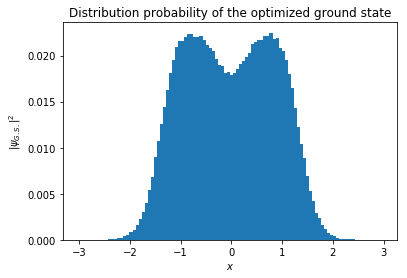

In [32]:
x, psi2 = np.loadtxt("output.psi2.0", usecols=(0,1), unpack='true')
plt.bar(x,psi2, width=(x[1]-x[0]))
plt.xlabel(r'$x$')
plt.ylabel(r'$\left | \psi_{G.S.}\right |^{2}$')
plt.title('Distribution probability of the optimized ground state')

plt.show()

## <span style="color:black"> Esercizio 08.3 </span>

Infine è stato utilizzato il codice formito per simulare lo stesso sistema con i metodi di Path Integral Ground State (PIGS) a temperatura nulla $T=0$, e Path Integral Monte Carlo (PIMC) per temperatura finita $T>0$. 
Il codice è stato usato come fornito, aggiungendo semplicemente la descrizione matematica del sistema in esame, ovvero si è aggiunta la formula per il calcolo del potenziale esterno con le sue derivate prima e seconda e il calcolo della funzione di prova usata negli esercizi precedenti con la sua derivate seconda.

Utilizzando la funzione di prova costante $\psi=1$ con il potenziale $$ V(x) = x^4 - \frac{5}{2}x^2 $$
si sono individuati come parametri per avere una accettazione del circa 50% su tutte le mosse:
* *bownianMotionReconstructions* = 58
* *delta_translation* = 0.55
* *brownianBridgeReconstrucion* = 110

Nell'immagine sottostante sono rappresentati i risultati ottenuti: sulla sinistra quelli per temperatura nulla, con metodo PIGS, metre sulla destra quelli per tempertatura $T=1.25$.

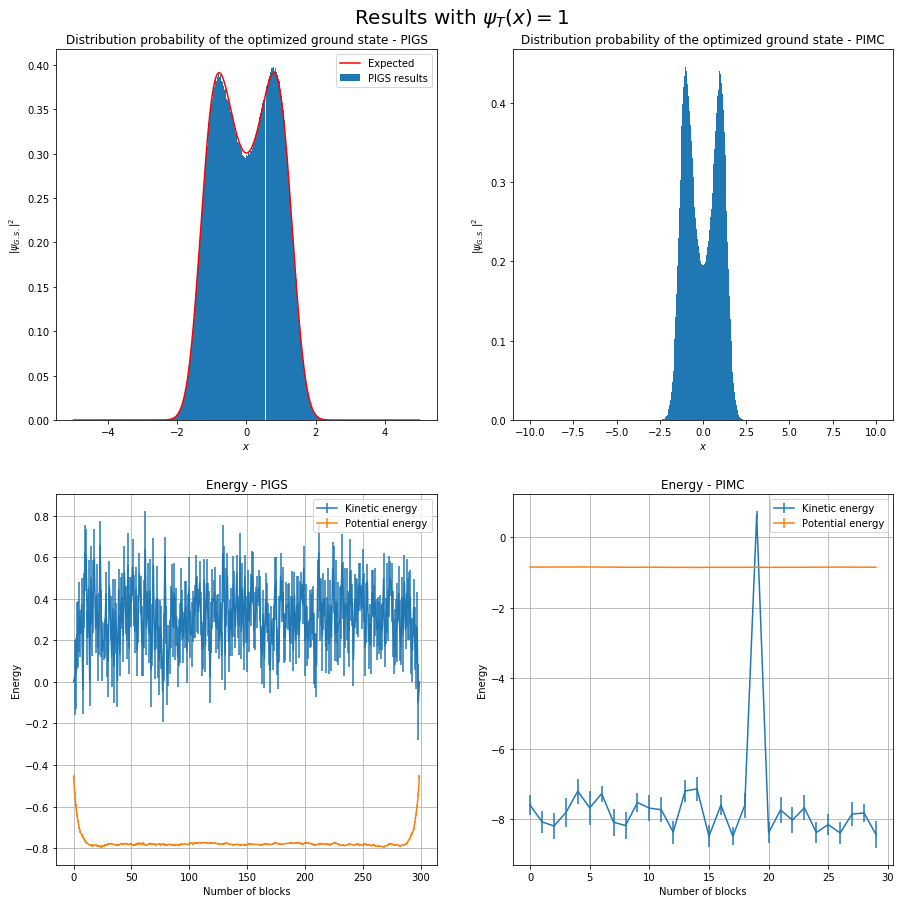

<Figure size 576x360 with 0 Axes>

In [82]:
fig = plt.figure(figsize=(15, 15))
fig.suptitle(r'Results with $\psi_T(x)=1$', y='0.92', size='20', weight='20')
gs = gridspec.GridSpec(2, 2, figure=fig)


ax = fig.add_subplot(gs[0, 0])
x, psi2 = np.loadtxt("QMC_1D/1_PIGS/probability.dat", usecols=(0,1), unpack='true')
ax.bar(x,psi2, width=(x[1]-x[0]), label='PIGS results')
plt.xlabel(r'$x$')
plt.ylabel(r'$\left | \psi_{G.S.}\right |^{2}$')
plt.title('Distribution probability of the optimized ground state - PIGS')

ax2 = fig.add_subplot(gs[1, 0])
x1, f1, error1 = np.loadtxt('QMC_1D/1_PIGS/kinetic.dat', usecols=(0,1,2), unpack='true')
ax2.errorbar(x1, f1, yerr=error1, label='Kinetic energy')
x2, f2, error2 = np.loadtxt('QMC_1D/1_PIGS/potential.dat', usecols=(0,1,2), unpack='true')
ax2.errorbar(x2, f2, yerr=error2, label='Potential energy')
plt.xlabel("Number of blocks")
plt.ylabel(r'Energy')
plt.title("Energy - PIGS")
plt.legend()
plt.grid()



ax3 = fig.add_subplot(gs[0, 1])
x, psi2 = np.loadtxt("QMC_1D/1_PIMC/probability.dat", usecols=(0,1), unpack='true')
ax3.bar(x,psi2, width=(x[1]-x[0]))
plt.xlabel(r'$x$')
plt.ylabel(r'$\left | \psi_{G.S.}\right |^{2}$')
plt.title('Distribution probability of the optimized ground state - PIMC')

ax4 = fig.add_subplot(gs[1, 1])
x1, f1, error1 = np.loadtxt('QMC_1D/1_PIMC/kinetic.dat', usecols=(0,1,2), unpack='true')
ax4.errorbar(x1, f1, yerr=error1, label='Kinetic energy')
x2, f2, error2 = np.loadtxt('QMC_1D/1_PIMC/potential.dat', usecols=(0,1,2), unpack='true')
ax4.errorbar(x2, f2, yerr=error2, label='Potential energy')
plt.xlabel("Number of blocks")
plt.ylabel(r'Energy')
plt.title("Energy - PIMC")
plt.legend()
plt.grid()

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2
    
hbar = 1
m = 1
a = 10
N = 1000 # number of iterations
# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)
# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)
# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)
# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
#ax3.plot(x, scale*V, color="Black", label="Potential") # plot the potential
ax.plot(x,(psi[0])**2,'r', label='Expected')
ax.legend()
plt.show()

Utilizzando invece la funzione di prova 
$$
\psi_T^{\sigma,\mu}(x) = e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                         e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$ con il medesimo potenziale si sono individuati come parametri per avere una accettazione del circa 50% su tutte le mosse:
* *delta_translation* = 2
* *brownianBridgeReconstrucion* = 80

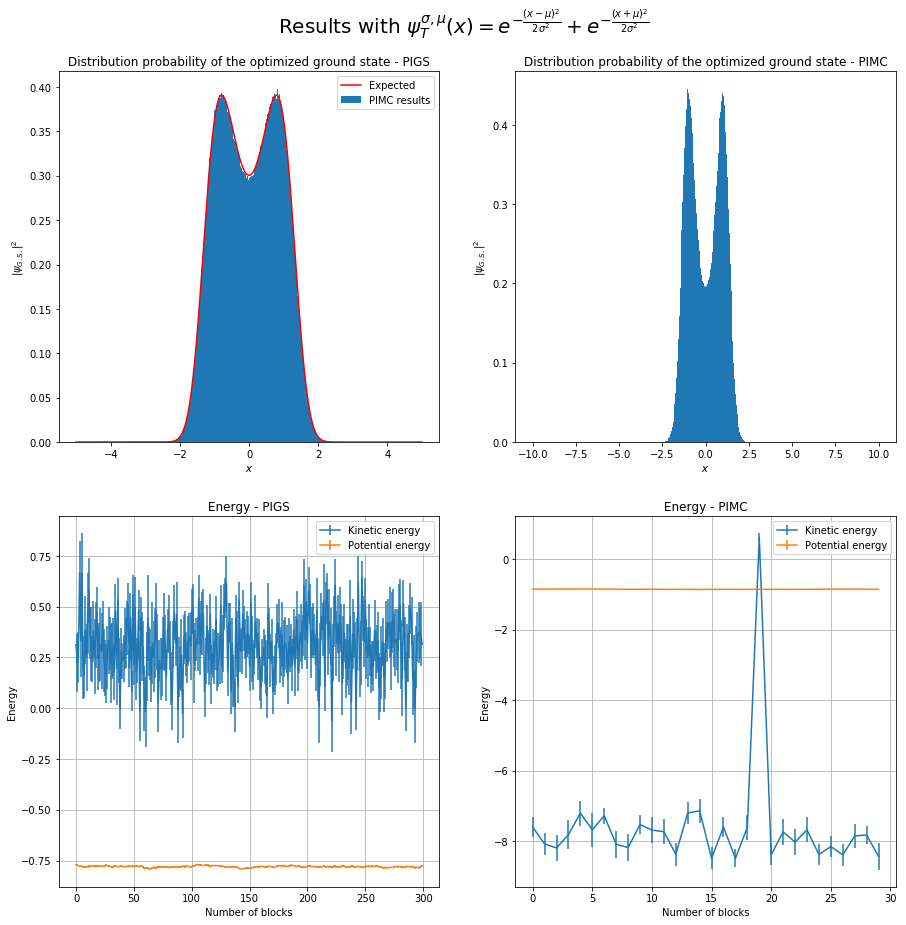

<Figure size 576x360 with 0 Axes>

In [84]:
fig = plt.figure(figsize=(15, 15))
fig.suptitle(r'Results with $\psi_T^{\sigma,\mu}(x) = e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}$', y='0.94', size='20', weight='20')
gs = gridspec.GridSpec(2, 2, figure=fig)


ax = fig.add_subplot(gs[0, 0])
x, psi2 = np.loadtxt("QMC_1D/psi_PIGS/probability.dat", usecols=(0,1), unpack='true')
ax.bar(x,psi2, width=(x[1]-x[0]), label='PIMC results')
plt.xlabel(r'$x$')
plt.ylabel(r'$\left | \psi_{G.S.}\right |^{2}$')
plt.title('Distribution probability of the optimized ground state - PIGS')

ax2 = fig.add_subplot(gs[1, 0])
x1, f1, error1 = np.loadtxt('QMC_1D/psi_PIGS/kinetic.dat', usecols=(0,1,2), unpack='true')
ax2.errorbar(x1, f1, yerr=error1, label='Kinetic energy')
x2, f2, error2 = np.loadtxt('QMC_1D/psi_PIGS/potential.dat', usecols=(0,1,2), unpack='true')
ax2.errorbar(x2, f2, yerr=error2, label='Potential energy')
plt.xlabel("Number of blocks")
plt.ylabel(r'Energy')
plt.title("Energy - PIGS")
plt.legend()
plt.grid()



ax3 = fig.add_subplot(gs[0, 1])
x, psi2 = np.loadtxt("QMC_1D/psi_PIMC/probability.dat", usecols=(0,1), unpack='true')
ax3.bar(x,psi2, width=(x[1]-x[0]))
plt.xlabel(r'$x$')
plt.ylabel(r'$\left | \psi_{G.S.}\right |^{2}$')
plt.title('Distribution probability of the optimized ground state - PIMC')

ax4 = fig.add_subplot(gs[1, 1])
x1, f1, error1 = np.loadtxt('QMC_1D/psi_PIMC/kinetic.dat', usecols=(0,1,2), unpack='true')
ax4.errorbar(x1, f1, yerr=error1, label='Kinetic energy')
x2, f2, error2 = np.loadtxt('QMC_1D/psi_PIMC/potential.dat', usecols=(0,1,2), unpack='true')
ax4.errorbar(x2, f2, yerr=error2, label='Potential energy')
plt.xlabel("Number of blocks")
plt.ylabel(r'Energy')
plt.title("Energy - PIMC")
plt.legend()
plt.grid()



def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2
    
hbar = 1
m = 1
a = 10
N = 1000 # number of iterations
# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)
# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)
# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)
# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
#ax3.plot(x, scale*V, color="Black", label="Potential") # plot the potential
ax.plot(x,(psi[0])**2,'r', label='Expected')
ax.legend()
plt.show()